# 영화 리뷰 분류: 이진 분류 예제

In [31]:
from keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

In [32]:
# train_data, test_data는 리뷰의 목록 : 각 리뷰는 단어 인덱스의 리스트
# train_labels, test_labels는 부정(0) / 긍정(1)
print('Train:',len(train_data))
print('Test:',len(test_data))

Train: 25000
Test: 25000


In [33]:
# 리뷰 데이터 하나를 원래 영어 단어로 변환
word_index = imdb.get_word_index()
reverse_word = dict([(v,k) for (k,v) in word_index.items()])
decode_review = ' '.join([reverse_word.get(i-3,'?') for i in train_data[5]])
decode_review

"? begins better than it ends funny that the russian submarine crew ? all other actors it's like those scenes where documentary shots br br spoiler part the message ? was contrary to the whole story it just does not ? br br"

## Data
#### 신경망에 숫자 리스트 주입 불가 -> 텐서로 변환 필요 -> 원-핫 인코딩

In [24]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듭니다
    return results

In [25]:
# 데이터를 벡터로 변환합니다
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [26]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [28]:
np.zeros((3,2))

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [34]:
# 레이블을 벡터로
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [35]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [36]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [37]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [38]:

from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [39]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [40]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [42]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 1s 86us/step - loss: 0.0101 - acc: 0.9975 - val_loss: 0.7340 - val_acc: 0.8656
Epoch 2/10
15000/15000 [==============================] - 1s 86us/step - loss: 0.0023 - acc: 0.9999 - val_loss: 0.7466 - val_acc: 0.8657
Epoch 3/10
15000/15000 [==============================] - 1s 86us/step - loss: 0.0049 - acc: 0.9988 - val_loss: 0.7848 - val_acc: 0.8656
Epoch 4/10
15000/15000 [==============================] - 1s 86us/step - loss: 0.0016 - acc: 0.9999 - val_loss: 0.8030 - val_acc: 0.8635
Epoch 5/10
15000/15000 [==============================] - 1s 86us/step - loss: 0.0062 - acc: 0.9982 - val_loss: 0.8432 - val_acc: 0.8632
Epoch 6/10
15000/15000 [==============================] - 1s 86us/step - loss: 9.6672e-04 - acc: 0.9999 - val_loss: 0.8555 - val_acc: 0.8622
Epoch 7/10
15000/15000 [==============================] - 1s 86us/step - loss: 8.2807e-04 - acc: 0.9999 - val_loss: 0.9074 -

In [46]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_acc', 'acc', 'loss', 'val_loss'])

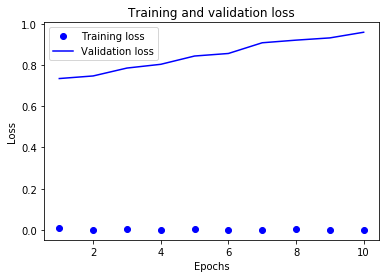

In [44]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

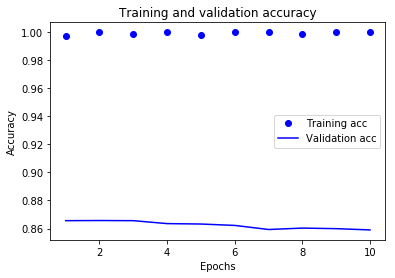

In [47]:
plt.clf()   # 그래프를 초기화합니다
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()